In [1]:
data <- read.csv("new_chr6_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
151373,chr6_3051300,3051200,3,121,208,86.428571,87.029289
68251,chr6_3051300,3051200,2,19,27,13.571428,11.297071
1,chr6_3051300,3051200,1,0,4,0.000000,1.673640
151374,chr6_3052600,3052500,3,105,189,84.677419,85.520362
68252,chr6_3052600,3052500,2,16,26,12.903226,11.764706
2,chr6_3052600,3052500,1,3,6,2.419355,2.714932
151375,chr6_3052800,3052700,3,40,73,62.500000,70.873786
68253,chr6_3052800,3052700,2,24,30,37.500000,29.126214
151376,chr6_3055300,3055200,3,64,129,64.646465,68.983957
68254,chr6_3055300,3055200,2,30,47,30.303030,25.133690


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
43911,chr6_3051300,3051200,121,19,0
43922,chr6_3052600,3052500,105,16,3
43924,chr6_3052800,3052700,40,24,0
43942,chr6_3055300,3055200,64,30,5
43943,chr6_3055400,3055300,79,36,16
43948,chr6_3055900,3055800,9,0,0
43956,chr6_3056800,3056700,10,0,0
43963,chr6_3057000,3056900,143,30,1
43971,chr6_3057800,3057700,31,62,15
43977,chr6_3058500,3058400,27,7,0


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 88721"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
43911,chr6_3051300,3051200,121,19,0,0
43922,chr6_3052600,3052500,105,16,3,1300
43924,chr6_3052800,3052700,40,24,0,200
43942,chr6_3055300,3055200,64,30,5,2500
43943,chr6_3055400,3055300,79,36,16,100
43948,chr6_3055900,3055800,9,0,0,500
43956,chr6_3056800,3056700,10,0,0,900
43963,chr6_3057000,3056900,143,30,1,200
43971,chr6_3057800,3057700,31,62,15,800
43977,chr6_3058500,3058400,27,7,0,700


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
43911,chr6_3051300,3051200,121,19,0,0
43943,chr6_3055400,3055300,79,36,16,100
43986,chr6_3059600,3059500,60,30,6,100
44210,chr6_3094500,3094400,49,1,0,100
44496,chr6_3121200,3121100,38,0,0,100
44499,chr6_3121300,3121200,59,6,0,100


,binID,start,high,medium,low,dist
43943,chr6_3055400,3055300,79,36,16,100
43986,chr6_3059600,3059500,60,30,6,100
44210,chr6_3094500,3094400,49,1,0,100
44496,chr6_3121200,3121100,38,0,0,100
44499,chr6_3121300,3121200,59,6,0,100
44500,chr6_3121400,3121300,84,11,0,100


[1] 11802

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3055200   3055300   3059400   3059500   3094300   3094400   3121000
    [8]   3121100   3121200   3121300   3132900   3133000   3138800   3138900
   [15]   3140700   3140800   3160100   3160200   3163100   3163200   3163600
   [22]   3163700   3180000   3180100   3182900   3183000   3183100   3190500
   [29]   3190600   3190700   3195600   3195700   3196900   3197000   3202300
   [36]   3202400   3202600   3202700   3202800   3205800   3205900   3206300
   [43]   3206400   3206500   3206600   3208000   3208100   3212300   3212400
   [50]   3213600   3213700   3224400   3224500   3224600   3224700   3237600
   [57]   3237700   3247600   3247700   3247800   3249700   3249800   3251400
   [64]   3251500   3254100   3254200   3255300   3255400   3259100   3259200
   [71]   3259300   3264600   3264700   3274400   3274500   3277500   3277600
   [78]   3280100   3280200   3280300   3283600   3283700   3284900   3285000
   [85]   3288200   3288300   3288400   3288500   3288600   3289000   3289100
   [92]   3289400   3289500   3289600   3291600   3291700   3291800   3293500
   [99]   3293600   3295000   3295100   3295200   3301700   3301800   3302300
  [106]   3302400   3305900   3306000   3306300   3306400   3306600   3306700
  [113]   3333500   3333600   3333700   3333800   3336700   3336800   3341400
  [120]   3341500   3376400   3376500   3444700   3444800   3445000   3445100
  [127]   3449200   3449300   3455200   3455300   3455600   3455700   3492000
  [134]   3492100   3498500   3498600   3511800   3511900   3517500   3517600
  [141]   3518600   3518700   3526100   3526200   3539100   3539200   3546700
  [148]   3546800   3546900   3552500   3552600   3557000   3557100   3571100
  [155]   3571200   3585000   3585100   3585200   3596400   3596500   3600100
  [162]   3600200   3611000   3611100   3620600   3620700   3622900   3623000
  [169]   3646700   3646800   3646900   3647000   3647100   3647200   3647300
  [176]   3656500   3656600   3656700   3656900   3657000   3664500   3664600
  [183]   3673700   3673800   3673900   3674000   3697400   3697500   3697600
  [190]   3697800   3697900   3698000   3698100   3698600   3698700   3718200
  [197]   3718300   3773400   3773500   3779200   3779300   3782700   3782800
  [204]   3787300   3787400   3787500   3787600   3787800   3787900   3788000
  [211]   3788500   3788600   3788700   3788900   3789000   3789100   3789200
  [218]   3789300   3789400   3789900   3790000   3790400   3790500   3792400
  [225]   3792500   3792800   3792900   3854200   3854300   3943000   3943100
  [232]   3946400   3946500   3953300   3953400   3957700   3957800   4018700
  [239]   4018800   4053700   4053800   4054600   4054700   4054800   4065600
  [246]   4065700   4092100   4092200   4107800   4107900   4117300   4117400
  [253]   4117500   4175600   4175700   4177000   4177100   4178300   4178400
  [260]   4178700   4178800   4184500   4184600   4184700   4185100   4185200
  [267]   4191100   4191200   4193300   4193400   4203200   4203300   4203500
  [274]   4203600   4282400   4282500   4301400   4301500   4321800   4321900
  [281]   4322100   4322200   4342200   4342300   4366500   4366600   4383700
  [288]   4383800   4395000   4395100   4397700   4397800   4400000   4400100
  [295]   4417000   4417100   4420500   4420600   4443500   4443600   4476100
  [302]   4476200   4486000   4486100   4486200   4492900   4493000   4518700
  [309]   4518800   4534100   4534200   4535800   4535900   4536000   4537900
  [316]   4538000   4538100   4539600   4539700   4557200   4557300   4560000
  [323]   4560100   4561100   4561200   4563600   4563700   4578400   4578500
  [330]   4578600   4582200   4582300   4606700   4606800   4607900   4608000
  [337]   4617100   4617200   4618100   4618200   4625700   4625800   4634500
  [344]   4634600   4650400   4650500   4653500   4653600   4655500   4655600
  [351]   4671700   4671800   4689600   4689700   4689800   4702500   4702600
  [358]   4705600   470570

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
43942,chr6_3055300,3055200,64,30,5
43943,chr6_3055400,3055300,79,36,16
43984,chr6_3059500,3059400,68,4,0
43986,chr6_3059600,3059500,60,30,6
44207,chr6_3094400,3094300,154,15,0
44210,chr6_3094500,3094400,49,1,0
44495,chr6_3121100,3121000,147,12,3
44496,chr6_3121200,3121100,38,0,0
44499,chr6_3121300,3121200,59,6,0
44500,chr6_3121400,3121300,84,11,0


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
43943,chr6_3055400,3055300,0.174096537816621
43984,chr6_3059500,3059400,0
43986,chr6_3059600,3059500,8.16223403990543e-06
44207,chr6_3094400,3094300,0
44210,chr6_3094500,3094400,0.182897313668413
44495,chr6_3121100,3121000,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
43943,chr6_3055400,3055300,0.174096537816621
44210,chr6_3094500,3094400,0.182897313668413
44496,chr6_3121200,3121100,0.149284424721968
44499,chr6_3121300,3121200,0.13517314158628
44500,chr6_3121400,3121300,0.83194452360414
44665,chr6_3139000,3138900,0.999999999999999


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3055200   3055300   3094300   3094400   3121000   3121100   3121200
   [8]   3121300   3138800   3138900   3140700   3140800   3163100   3163200
  [15]   3182900   3183000   3183100   3195600   3195700   3202700   3202800
  [22]   3205800   3205900   3206400   3206500   3212300   3212400   3224400
  [29]   3224500   3224600   3254100   3254200   3259100   3259200   3280100
  [36]   3280200   3283600   3283700   3288200   3288300   3288400   3288500
  [43]   3289000   3289100   3289400   3289500   3289600   3291700   3291800
  [50]   3295100   3295200   3301700   3301800   3306300   3306400   3333500
  [57]   3333600   3445000   3445100   3449200   3449300   3455200   3455300
  [64]   3492000   3492100   3511800   3511900   3552500   3552600   3557000
  [71]   3557100   3585000   3585100   3585200   3600100   3600200   3620600
  [78]   3620700   3647200   3647300   3656500   3656600   3656700   3656900
  [85]   3657000   3673700   3673800   3697400   3697500   3697600   3697900
  [92]   3698000   3698100   3698600   3698700   3718200   3718300   3773400
  [99]   3773500   3787400   3787500   3787600   3787800   3787900   3788500
 [106]   3788600   3788700   3789200   3789300   3789400   3789900   3790000
 [113]   3792400   3792500   3792800   3792900   3854200   3854300   3953300
 [120]   3953400   4018700   4018800   4065600   4065700   4092100   4092200
 [127]   4117300   4117400   4117500   4175600   4175700   4177000   4177100
 [134]   4178300   4178400   4203200   4203300   4282400   4282500   4321800
 [141]   4321900   4342200   4342300   4366500   4366600   4383700   4383800
 [148]   4397700   4397800   4417000   4417100   4420500   4420600   4476100
 [155]   4476200   4486000   4486100   4492900   4493000   4535900   4536000
 [162]   4538000   4538100   4539600   4539700   4557200   4557300   4560000
 [169]   4560100   4563600   4563700   4578400   4578500   4578600   4617100
 [176]   4617200   4625700   4625800   4653500   4653600   4689600   4689700
 [183]   4689800   4702500   4702600   4705900   4706000   4723700   4723800
 [190]   4749200   4749300   4751400   4751500   4754100   4754200   4758100
 [197]   4758200   4759200   4759300   4807000   4807100   4889700   4889800
 [204]   4910300   4910400   4918600   4918700   4919100   4919200   4923200
 [211]   4923300   4923400   4930500   4930600   4931300   4931400   4966300
 [218]   4966400   4968200   4968300   4968400   4975100   4975200   5029300
 [225]   5029400   5064800   5064900   5095700   5095800   5129900   5130000
 [232]   5143800   5143900   5162100   5162200   5208600   5208700   5259200
 [239]   5259300   5297300   5297400   5318600   5318700   5328600   5328700
 [246]   5386800   5386900   5390100   5390200   5480000   5480100   5480200
 [253]   5485300   5485400   5491600   5491700   5525100   5525200   5561500
 [260]   5561600   5585200   5585300   5585400   5585500   5589800   5589900
 [267]   5598800   5598900   5615100   5615200   5661100   5661200   5676600
 [274]   5676700   5758000   5758100   5769700   5769800   5796600   5796700
 [281]   5815800   5815900   5824400   5824500   5829600   5829700   5847500
 [288]   5847600   5858400   5858500   5875900   5876000   5898200   5898300
 [295]   5930900   5931000   5936000   5936100   5947400   5947500   5952300
 [302]   5952400   5972100   5972200   6006200   6006300   6018000   6018100
 [309]   6051600   6051700   6064800   6064900   6069200   6069300   6069500
 [316]   6069600   6074900   6075000   6092400   6092500   6109100   6109200
 [323]   6115500   6115600   6132700   6132800   6184700   6184800   6187800
 [330]   6187900   6233300   6233400   6251100   6251200   6299700   6299800
 [337]   6300900   6301000   6340800   6340900   6359800   6359900   6424900
 [344]   6425000   6468600   6468700   6469200   6469300   6470500   6470600
 [351]   6506600   6506700   6520100   6520200   6543000   6543100   6625800
 [358]   6625900   6626100   6626200   6626300   6627000   6627100   6639100

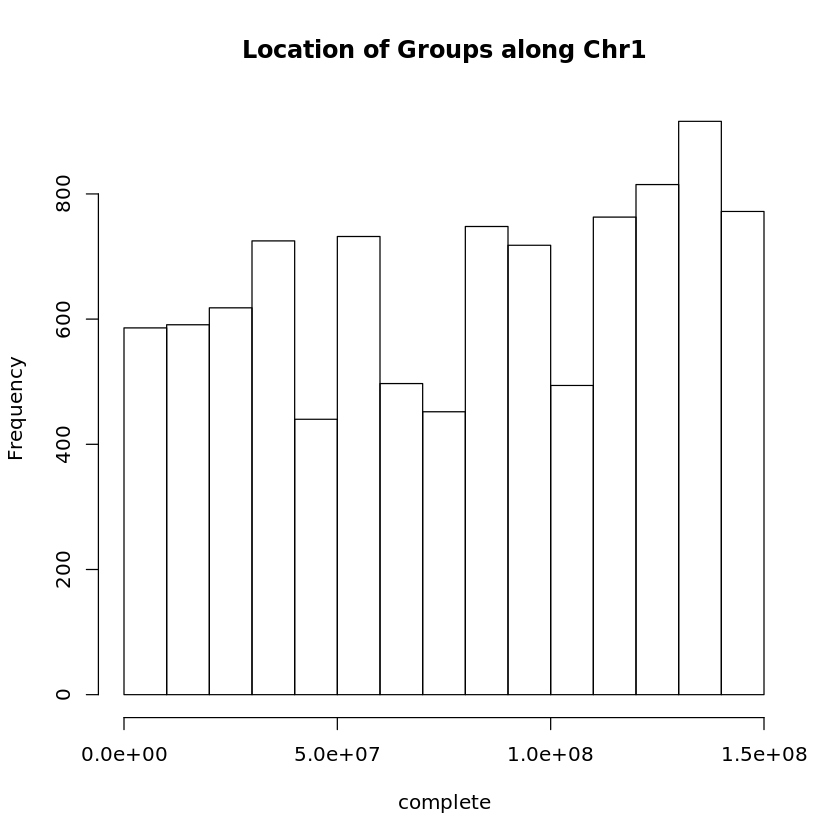

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
43942,chr6_3055300,3055200,64,30,5
43943,chr6_3055400,3055300,79,36,16
44207,chr6_3094400,3094300,154,15,0
44210,chr6_3094500,3094400,49,1,0
44495,chr6_3121100,3121000,147,12,3
44496,chr6_3121200,3121100,38,0,0
44499,chr6_3121300,3121200,59,6,0
44500,chr6_3121400,3121300,84,11,0
44663,chr6_3138900,3138800,192,42,0
44665,chr6_3139000,3138900,66,15,0


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 9867"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
110,gap 6,0,100,100,100
21,chr6_3183000,3182900,0,0,1
22,chr6_3183100,3183000,5,0,5
23,chr6_3183200,3183100,50,31,27
111,gap 7,0,100,100,100
25,chr6_3195700,3195600,79,35,6
26,chr6_3195800,3195700,55,11,3
112,gap 8,0,100,100,100
28,chr6_3202800,3202700,201,29,0
29,chr6_3202900,3202800,72,13,0


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
43942,chr6_3055300,3055200,64,30,5
2,chr6_3055400,3055300,79,36,16
1,gap 1,0,100,100,100
4,chr6_3094400,3094300,154,15,0
5,chr6_3094500,3094400,49,1,0
11,gap 2,0,100,100,100


,binID,start,high,medium,low
15282,gap 4631,0,100,100,100
144951,chr6_149504000,149503900,13,0,0
144961,chr6_149504100,149504000,14,0,0
15283,gap 4632,0,100,100,100
144981,chr6_149519100,149519000,76,4,0
144991,chr6_149519200,149519100,58,0,0


In [20]:
write.csv(part, "chr6_A_group.csv")

[1] "Total Number of groups: 4633"

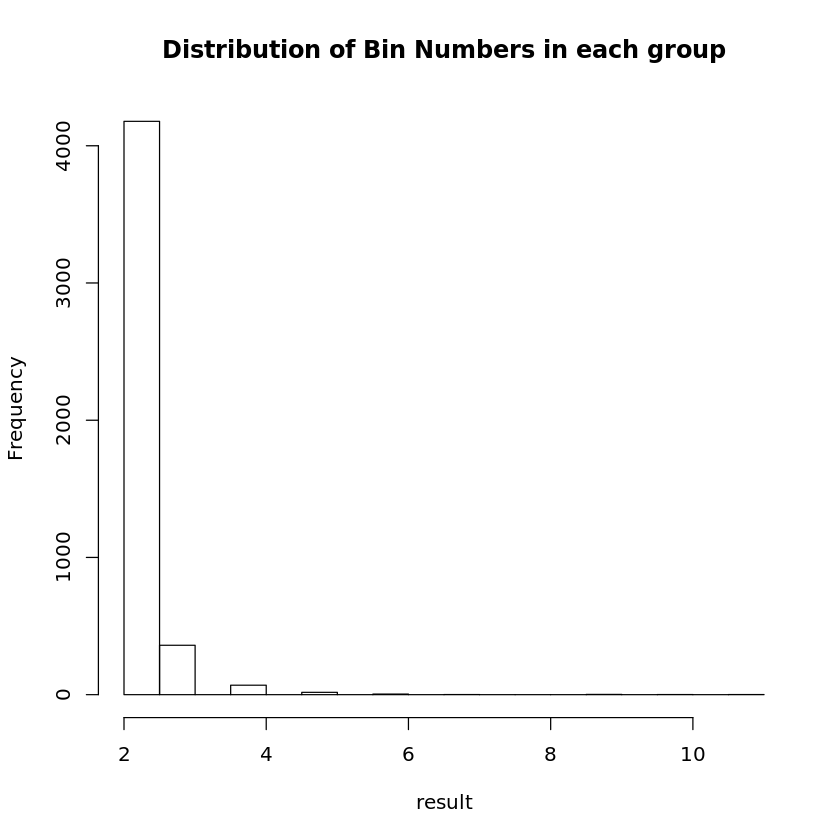

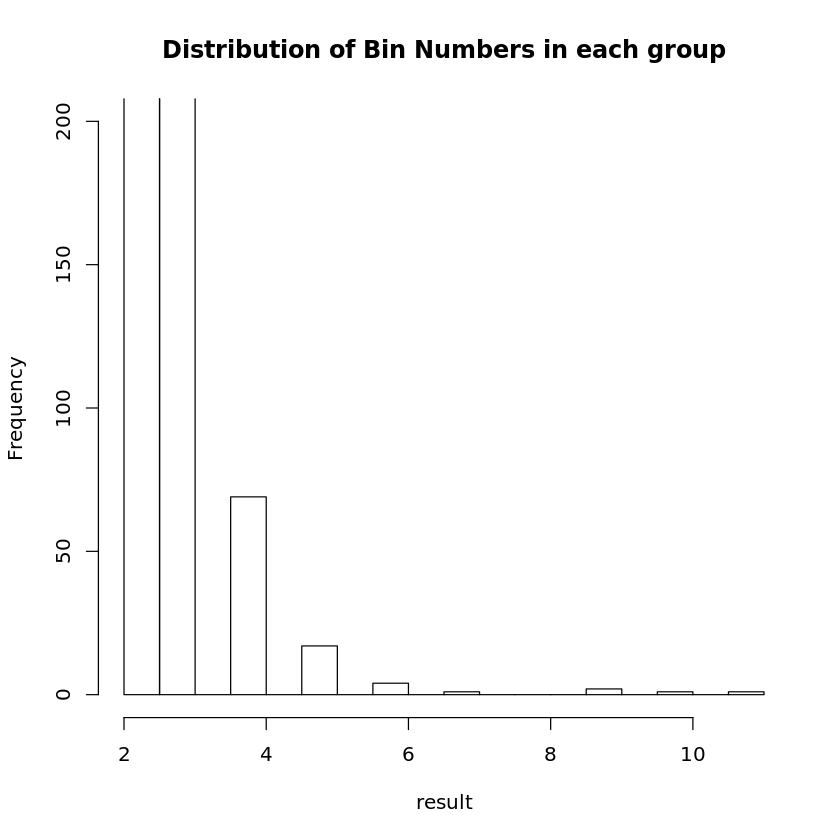

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")